In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/UBC-OCEAN/updated_image_ids.json
/kaggle/input/UBC-OCEAN/sample_submission.csv
/kaggle/input/UBC-OCEAN/train.csv
/kaggle/input/UBC-OCEAN/test.csv
/kaggle/input/UBC-OCEAN/test_thumbnails/41_thumbnail.png
/kaggle/input/UBC-OCEAN/train_images/14127.png
/kaggle/input/UBC-OCEAN/train_images/34649.png
/kaggle/input/UBC-OCEAN/train_images/15221.png
/kaggle/input/UBC-OCEAN/train_images/52375.png
/kaggle/input/UBC-OCEAN/train_images/17487.png
/kaggle/input/UBC-OCEAN/train_images/32112.png
/kaggle/input/UBC-OCEAN/train_images/22290.png
/kaggle/input/UBC-OCEAN/train_images/48734.png
/kaggle/input/UBC-OCEAN/train_images/39146.png
/kaggle/input/UBC-OCEAN/train_images/64950.png
/kaggle/input/UBC-OCEAN/train_images/32042.png
/kaggle/input/UBC-OCEAN/train_images/63429.png
/kaggle/input/UBC-OCEAN/train_images/13526.png
/kaggle/input/UBC-OCEAN/train_images/53859.png
/kaggle/input/UBC-OCEAN/train_images/63836.png
/kaggle/input/UBC-OCEAN/train_images/56117.png
/kaggle/input/UBC-OCEAN/train_i

In [2]:
import warnings
warnings.filterwarnings("ignore") 

In [3]:
import matplotlib.pyplot as plt

In [4]:
img=plt.imread("/kaggle/input/UBC-OCEAN/train_thumbnails/10077_thumbnail.png")

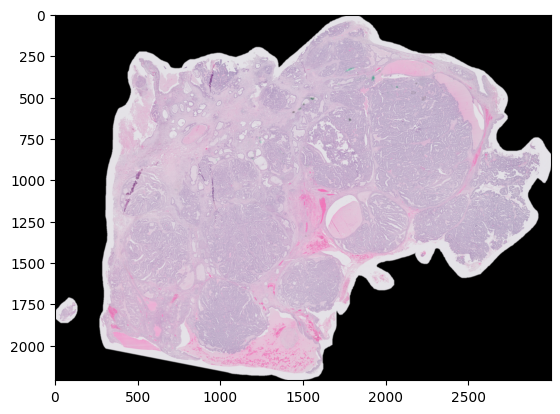

In [5]:
plt.imshow(img)

In [6]:

print(img.min())
print(img.max())
print(img.shape)


0.0
1.0
(2210, 3000, 3)


In [7]:
train_df=pd.read_csv("/kaggle/input/UBC-OCEAN/train.csv")
test_df=pd.read_csv("/kaggle/input/UBC-OCEAN/test.csv")


In [8]:
train_df.head(10)

image_id label  image_width  image_height  is_tma
0         4  HGSC        23785         20008   False
1        66  LGSC        48871         48195   False
2        91  HGSC         3388          3388    True
3       281  LGSC        42309         15545   False
4       286    EC        37204         30020   False
5       431  HGSC        39991         40943   False
6       706  HGSC        75606         25965   False
7       970  HGSC        32131         18935   False
8      1020  HGSC        36585         33751   False
9      1080  HGSC        31336         23200   False

In [9]:
test_df

image_id  image_width  image_height
0        41        28469         16987

In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 538 entries, 0 to 537
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   image_id      538 non-null    int64 
 1   label         538 non-null    object
 2   image_width   538 non-null    int64 
 3   image_height  538 non-null    int64 
 4   is_tma        538 non-null    bool  
dtypes: bool(1), int64(3), object(1)
memory usage: 17.5+ KB


In [11]:
train_df.shape

(538, 5)

In [12]:
train_df.columns

Index(['image_id', 'label', 'image_width', 'image_height', 'is_tma'], dtype='object')

In [13]:
train_df.describe().T

count          mean           std     min       25%      50%  \
image_id      538.0  32194.340149  18774.950592     4.0  15881.25  32152.0   
image_width   538.0  48859.533457  20040.989927  2964.0  34509.00  48160.0   
image_height  538.0  29729.460967  10762.899796  2964.0  22089.50  29732.0   

                   75%       max  
image_id      47892.50   65533.0  
image_width   64143.75  105763.0  
image_height  37880.75   50155.0

In [14]:
train_df.isna().sum()

image_id        0
label           0
image_width     0
image_height    0
is_tma          0
dtype: int64

In [15]:
train_df.duplicated().sum()

0

In [16]:
train_df.nunique()

image_id        538
label             5
image_width     508
image_height    508
is_tma            2
dtype: int64

In [17]:
train_df["label"].value_counts()

label
HGSC    222
EC      124
CC       99
LGSC     47
MC       46
Name: count, dtype: int64

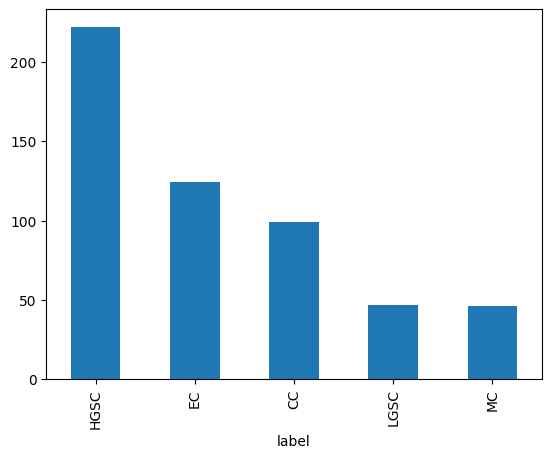

In [18]:
train_df["label"].value_counts().plot(kind="bar")
plt.show()

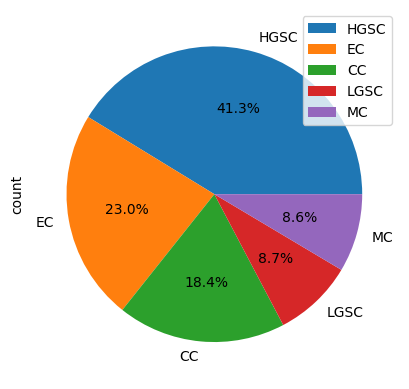

In [19]:
train_df['label'].value_counts().plot(kind='pie',autopct="%.1f%%")
plt.legend()
plt.show()

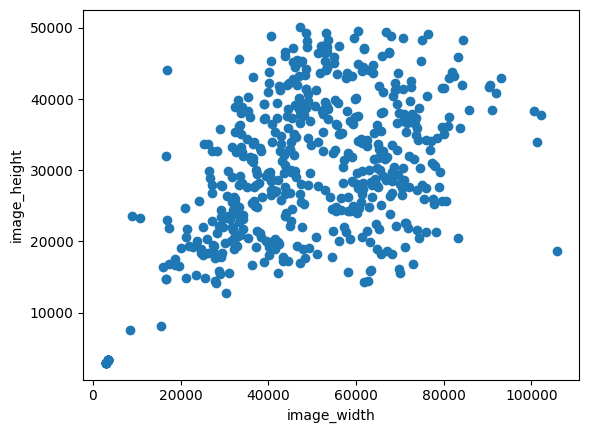

In [20]:
plt.scatter(train_df["image_width"],train_df["image_height"])
plt.xlabel("image_width")
plt.ylabel("image_height")
plt.show()

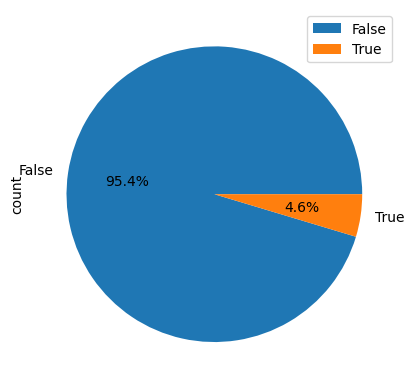

In [21]:
train_df['is_tma'].value_counts().plot(kind="pie",autopct="%.1f%%")
plt.legend()
plt.show()

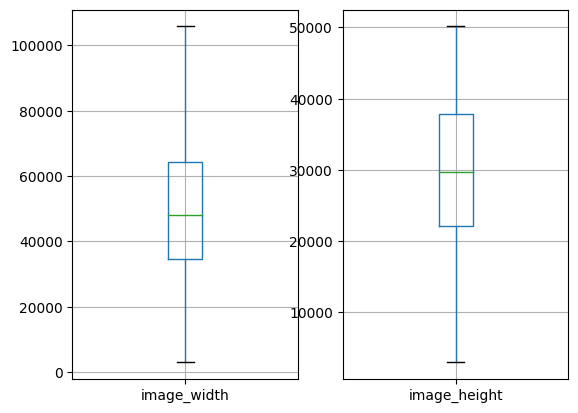

In [22]:
plt.subplot(1,2,1)
train_df[['image_width']].boxplot()
plt.subplot(1,2,2)
train_df[['image_height']].boxplot()
plt.show()

In [23]:
# import seaborn as sns
# sns.pairplot(train_df, hue="label")
# plt.suptitle("Pairplot by Class", y=1.02)
# plt.show()

In [24]:
train_df["label"].unique()

array(['HGSC', 'LGSC', 'EC', 'CC', 'MC'], dtype=object)

In [25]:
class_labels = ['HGSC', 'LGSC', 'EC', 'CC', 'MC']
train_df['label'] = train_df['label'].replace({'HGSC':0, 'LGSC':1, 'EC':2, 'CC':3, 'MC':4})
train_df.head()

image_id  label  image_width  image_height  is_tma
0         4      0        23785         20008   False
1        66      1        48871         48195   False
2        91      0         3388          3388    True
3       281      1        42309         15545   False
4       286      2        37204         30020   False

In [26]:
train_df['is_tma'] = train_df['is_tma'].astype('int')
train_df.head()

image_id  label  image_width  image_height  is_tma
0         4      0        23785         20008       0
1        66      1        48871         48195       0
2        91      0         3388          3388       1
3       281      1        42309         15545       0
4       286      2        37204         30020       0

In [27]:
path_train = "/kaggle/input/UBC-OCEAN/train_images"
path_test = "/kaggle/input/UBC-OCEAN/test_images"
train_folder = os.listdir(path_train)
test_folder = os.listdir(path_test)

print(f"train_images = {len(train_folder)}")
print(f"test_images = {len(test_folder)}")

train_images = 538
test_images = 1


In [28]:
train_folder[:4]

['14127.png', '34649.png', '15221.png', '52375.png']

In [29]:
test_folder

['41.png']

In [30]:
path_train_thumbnails = "/kaggle/input/UBC-OCEAN/train_thumbnails"
path_test_thumbnails = "/kaggle/input/UBC-OCEAN/test_thumbnails"
train_folder_thumbnails = os.listdir(path_train_thumbnails)
test_folder_thumbnails = os.listdir(path_test_thumbnails)

print(len(train_folder_thumbnails))
print(len(test_folder_thumbnails))

513
1


In [31]:
train_df.head()

image_id  label  image_width  image_height  is_tma
0         4      0        23785         20008       0
1        66      1        48871         48195       0
2        91      0         3388          3388       1
3       281      1        42309         15545       0
4       286      2        37204         30020       0

In [32]:
train_tma = train_df[train_df["is_tma"] == 1]
train_no_tma = train_df[train_df["is_tma"] == 0]

In [33]:
train_tma.head()

image_id  label  image_width  image_height  is_tma
2          91      0         3388          3388       1
37       4134      4         2964          2964       1
76       8280      0         2964          2964       1
83       9200      4         3388          3388       1
112     13568      1         2964          2964       1

In [34]:
train_tma['image_dir']=[str(i)+".png" for i in train_tma['image_id']]

train_no_tma['image_dir']=[str(i)+"_thumbnail.png" for i in train_no_tma['image_id']]

test_df['image_dir']=[str(i)+"_thumbnail.png" for i in test_df['image_id']]

In [35]:
train_tma.head()

image_id  label  image_width  image_height  is_tma  image_dir
2          91      0         3388          3388       1     91.png
37       4134      4         2964          2964       1   4134.png
76       8280      0         2964          2964       1   8280.png
83       9200      4         3388          3388       1   9200.png
112     13568      1         2964          2964       1  13568.png

In [36]:
thumbnails_df=train_no_tma
thumbnails_df["label"].value_counts()

label
0    217
2    119
3     94
1     42
4     41
Name: count, dtype: int64

In [37]:
os.chdir('/kaggle/input/UBC-OCEAN/train_thumbnails')

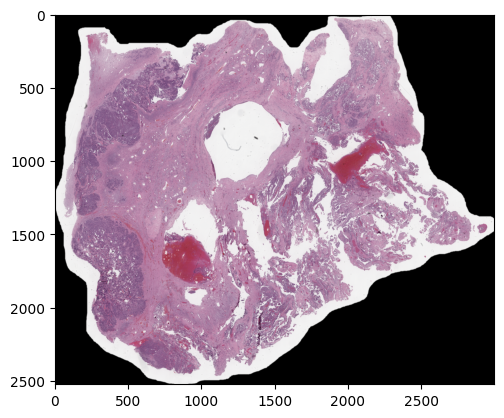

In [38]:
plt.imshow(plt.imread(thumbnails_df['image_dir'][0]))


In [39]:
from PIL import Image
img = Image.open('/kaggle/input/UBC-OCEAN/train_thumbnails/4_thumbnail.png')
img.size


(3000, 2523)

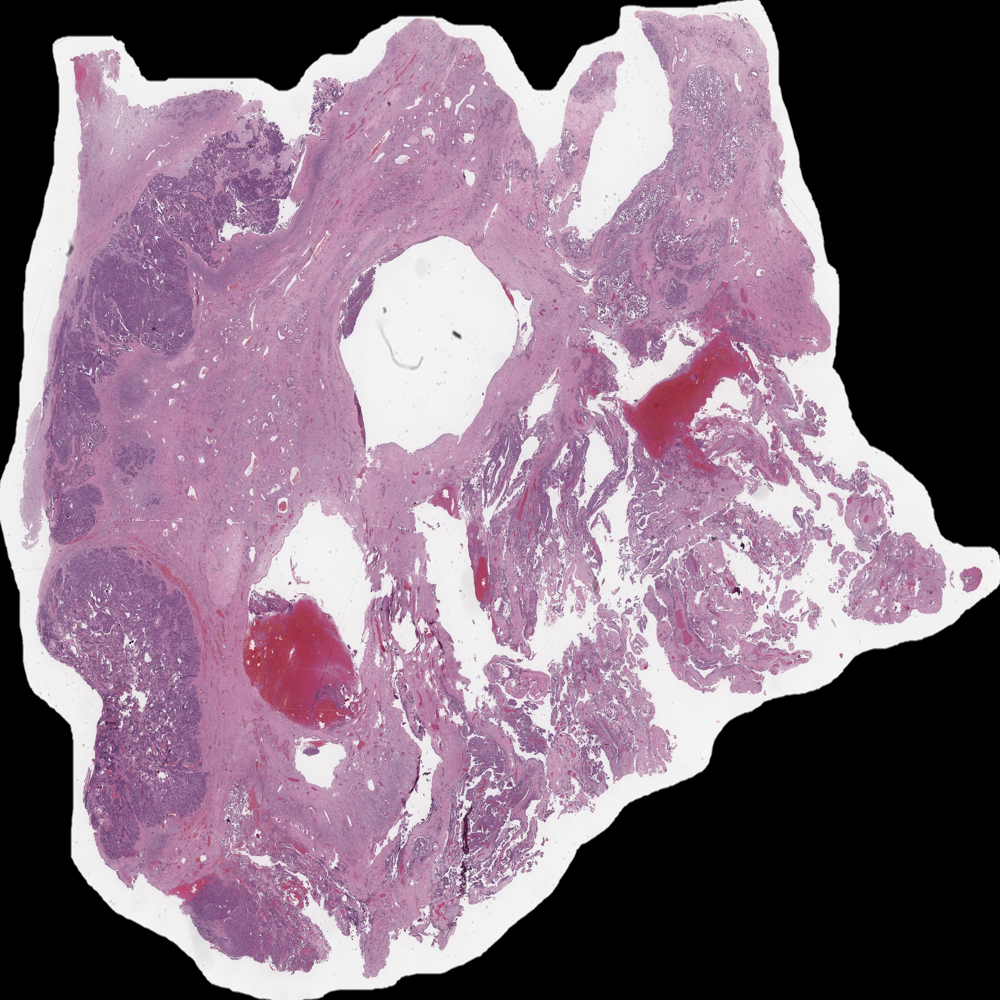

In [40]:
img.resize((1000,1000))

In [41]:
# train_df = pd.concat([train_tma, train_no_tma])
# train_df.sort_index(ascending = True, inplace = True)
# train_df.head()

In [42]:
train_folder_thumbnails[:3] 

['52275_thumbnail.png', '47960_thumbnail.png', '4_thumbnail.png']

In [43]:
train_folder[:3]

['14127.png', '34649.png', '15221.png']

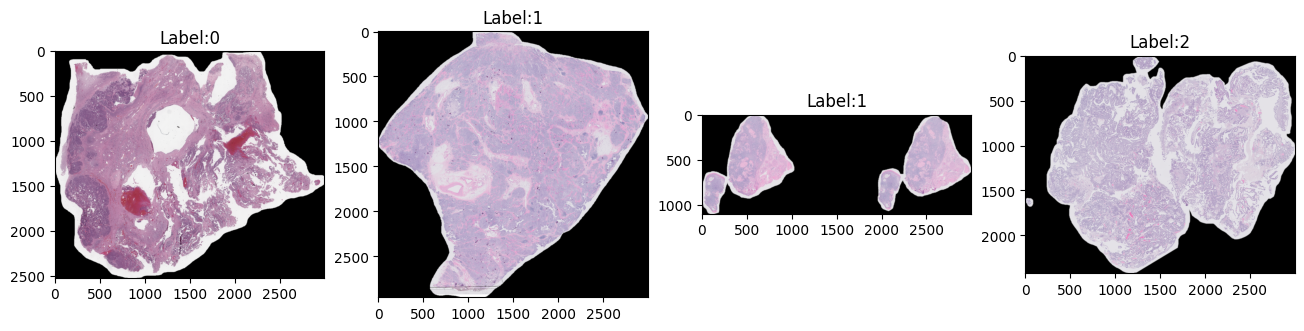

In [44]:
plt.figure(figsize=(16,24))
#  "/kaggle/input/UBC-OCEAN/train_thumbnails"
j=1
for img, lb in zip(thumbnails_df['image_dir'][:4],thumbnails_df['label'][:4]):
    plt.subplot(1,4,j)
    path = os.path.join("/kaggle/input/UBC-OCEAN/train_thumbnails/",img)
    image = plt.imread(path)
    image = plt.imshow(image)
    plt.title(f"Label:{lb}")
    j+=1

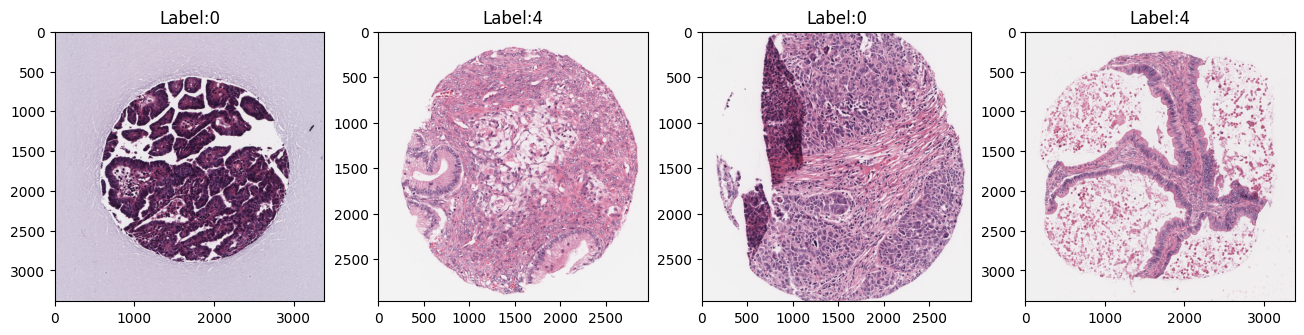

In [45]:
plt.figure(figsize=(16,28))
#  "/kaggle/input/UBC-OCEAN/train_images"
j=1
for img, lb in zip(train_tma['image_dir'][:4],train_tma['label'][:4]):
    plt.subplot(1,4,j)
    path = os.path.join("/kaggle/input/UBC-OCEAN/train_images",img)
    image = plt.imread(path)
    image = plt.imshow(image)
    plt.title(f"Label:{lb}")
    j+=1

In [46]:
! pip install -U imbalanced-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.7/257.7 kB 9.7 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.11.0
    Uninstalling imbalanced-learn-0.11.0:
      Successfully uninstalled imbalanced-learn-0.11.0


In [47]:
x_y_thumb_df = pd.DataFrame({
    'image_dir': thumbnails_df['image_dir'],
    'label': thumbnails_df['label']
})

In [48]:
x_y_thumb_df["label"].value_counts()

label
0    217
2    119
3     94
1     42
4     41
Name: count, dtype: int64

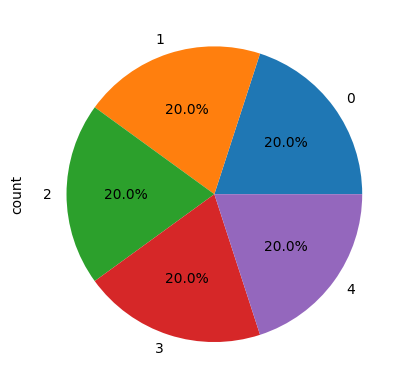

In [49]:
from imblearn.under_sampling import RandomUnderSampler
sampling_strategy_dict = {
0:41,  
1:41,  
2:41,
3:41,
4:41
}
rus = RandomUnderSampler(sampling_strategy=sampling_strategy_dict,random_state=42) 

x_res, y_res = rus.fit_resample(x_y_thumb_df[['image_dir']], x_y_thumb_df['label'])

y_res.value_counts().plot.pie(autopct="%.1f%%")
plt.show()

In [50]:
print(x_res.shape)
print(y_res.shape)
print(y_res.value_counts())

(205, 1)
(205,)
label
0    41
1    41
2    41
3    41
4    41
Name: count, dtype: int64


In [51]:
x_res["image_dir"]

512    61852_thumbnail.png
535    65300_thumbnail.png
329    39146_thumbnail.png
437    52308_thumbnail.png
26      3055_thumbnail.png
              ...         
171    20329_thumbnail.png
406    48502_thumbnail.png
433    51893_thumbnail.png
471    56351_thumbnail.png
50      5456_thumbnail.png
Name: image_dir, Length: 205, dtype: object

In [52]:
y_res

512    0
535    0
329    0
437    0
26     0
      ..
171    4
406    4
433    4
471    4
50     4
Name: label, Length: 205, dtype: int64

In [53]:
train_tma["label"].value_counts()

label
0    5
4    5
1    5
2    5
3    5
Name: count, dtype: int64

In [54]:
train_tma

image_id  label  image_width  image_height  is_tma  image_dir
2          91      0         3388          3388       1     91.png
37       4134      4         2964          2964       1   4134.png
76       8280      0         2964          2964       1   8280.png
83       9200      4         3388          3388       1   9200.png
112     13568      1         2964          2964       1  13568.png
149     17637      0         2964          2964       1  17637.png
176     21020      4         3388          3388       1  21020.png
236     29084      1         3388          3388       1  29084.png
263     31594      2         3388          3388       1  31594.png
288     35565      4         2964          2964       1  35565.png
299     36302      3         3388          3388       1  36302.png
302     36583      1         3388          3388       1  36583.png
305     36783      4         2964          2964       1  36783.png
309     37385      1         3388          3388       1  37385.png
350     40864      1         2964          2964       1  40864.png
354     41368      2         3388          3388       1  41368.png
355     41586      3         2964          2964       1  41586.png
361     42857      3         2964          2964       1  42857.png
375     44603      3         3388          3388       1  44603.png
399     47035      2         2964          2964       1  47035.png
409     48734      2         3388          3388       1  48734.png
423     50932      0         2964          2964       1  50932.png
452     53655      2         3388          3388       1  53655.png
484     57696      3         3388          3388       1  57696.png
510     61797      0         3388          3388       1  61797.png

In [55]:
x_res["image_dir"].shape

(205,)

In [56]:
y_res.shape

(205,)

In [57]:
# sdir = '/kaggle/working/'
# train_dir = os.path.join(sdir, 'train')
# os.makedirs(train_dir)
# val_dir = os.path.join(sdir, 'val')
# os.makedirs(val_dir)

In [58]:
image_data = []
image_label = []

#  "/kaggle/input/UBC-OCEAN/train_thumbnails"
# "/kaggle/input/UBC-OCEAN/train_images/"

for img , label in zip(x_res["image_dir"],y_res):
    
    image = Image.open("/kaggle/input/UBC-OCEAN/train_thumbnails/"+img)
    
    image = image.resize((224,224))
    
    image = image.convert("RGB")
    
    image = np.array(image)
    
    image_data.append(image)
    image_label.append(label)

for img , label in zip(train_tma['image_dir'],train_tma['label']):
    
    image = Image.open("/kaggle/input/UBC-OCEAN/train_images/"+img)
    image = image.resize((224,224))
    image = image.convert("RGB")
    image = np.array(image)
    image_data.append(image)
    image_label.append(label)

In [59]:
print(len(image_data))
print(len(image_label))

230
230


In [60]:
image_label[:4]

[0, 0, 0, 0]

In [61]:
image_data[0]

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [62]:
print(image_data[0].max())
print(image_data[0].min())
print(image_data[0].shape)

243
0
(224, 224, 3)


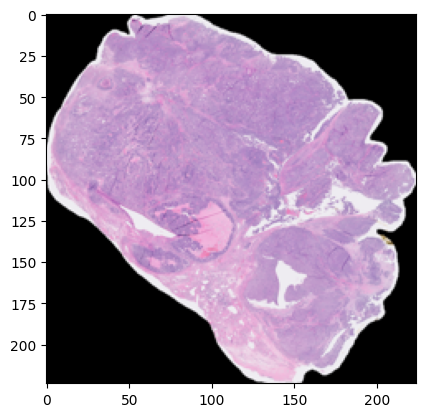

In [63]:
from tensorflow.keras.preprocessing.image import array_to_img

w=array_to_img(image_data[0])
plt.imshow(w)

In [64]:
x = np.array(image_data)
y = np.array(image_label)

In [65]:
x.shape

(230, 224, 224, 3)

In [66]:
y.shape

(230,)

In [67]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        rotation_range=15,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True
        )


augmented_images = []
augmented_labels = []


for i in range(len(x)):
    image = x[i]
    label = y[i]
    image = np.expand_dims(image, axis=0)
    label = np.array([label])
    augmented_images_batch, augmented_labels_batch = [], []
    j=0
    for x_batch, y_batch in datagen.flow(image, label, batch_size=4):
        augmented_images_batch.extend(x_batch)
        augmented_labels_batch.extend(y_batch)
        j+=1
        if j>6:
            break
    augmented_images.extend(augmented_images_batch)
    augmented_labels.extend(augmented_labels_batch)

augmented_images = np.array(augmented_images)
augmented_labels = np.array(augmented_labels)

In [68]:
print(x.shape)
print(augmented_images.shape)

(230, 224, 224, 3)
(1610, 224, 224, 3)


In [69]:
augmented_labels

array([0, 0, 0, ..., 0, 0, 0])

In [70]:
print(len(augmented_labels))

1610


In [71]:
x=np.concatenate((x, augmented_images), axis=0)
y=np.concatenate((y,augmented_labels), axis=0)
print(x.shape)

(1840, 224, 224, 3)


In [72]:
from sklearn.model_selection import train_test_split
x_train , x_val, y_train, y_val = train_test_split(x,y,test_size=0.20,shuffle=True,random_state=42)
print(x_train.shape)
print(x_val.shape)
print(y_train.shape)
print(y_val.shape)

(1472, 224, 224, 3)
(368, 224, 224, 3)
(1472,)
(368,)


In [73]:
x_train

array([[[[  0.      ,   0.      ,   0.      ],
         [  0.      ,   0.      ,   0.      ],
         [  0.      ,   0.      ,   0.      ],
         ...,
         [  0.      ,   0.      ,   0.      ],
         [  0.      ,   0.      ,   0.      ],
         [  0.      ,   0.      ,   0.      ]],

        [[  0.      ,   0.      ,   0.      ],
         [  0.      ,   0.      ,   0.      ],
         [  0.      ,   0.      ,   0.      ],
         ...,
         [  0.      ,   0.      ,   0.      ],
         [  0.      ,   0.      ,   0.      ],
         [  0.      ,   0.      ,   0.      ]],

        [[  0.      ,   0.      ,   0.      ],
         [  0.      ,   0.      ,   0.      ],
         [  0.      ,   0.      ,   0.      ],
         ...,
         [  0.      ,   0.      ,   0.      ],
         [  0.      ,   0.      ,   0.      ],
         [  0.      ,   0.      ,   0.      ]],

        ...,

        [[  0.      ,   0.      ,   0.      ],
         [  0.      ,   0.      ,   0.      ]

In [74]:
y_train

array([1, 1, 2, ..., 2, 4, 3])

In [75]:
x_train_scaled = x_train/255
x_val_scaled = x_val/255

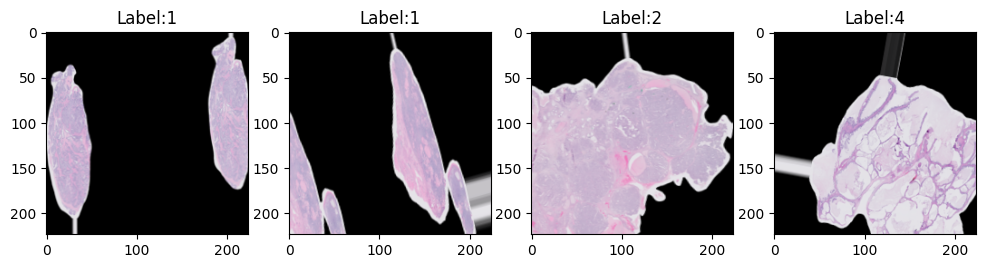

In [76]:
plt.figure(figsize=(12,16))

for i in range(4):
    plt.subplot(1,4,i+1)
    plt.imshow(x_train_scaled[i])
    plt.title(f"Label:{y_train[i]}")

In [77]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Input, Dense,Conv2D , MaxPooling2D,MaxPool2D, Flatten,BatchNormalization,Dropout
from tensorflow.keras.preprocessing import image_dataset_from_directory
import tensorflow_hub as hub 
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

In [78]:
model = Sequential()
model.add(Conv2D(filters=120,kernel_size=(3,3),strides=(1,1),activation='relu',input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=100,kernel_size=(3,3),strides=(1,1),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=80,kernel_size=(3,3),strides=(1,1),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),strides=(1,1),activation='relu',input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(units=600,activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(units=600,activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(units=5,activation='softmax'))

model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",
             metrics=["accuracy"])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 120)     3360      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 120)    0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 100)     108100    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 100)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 80)        72080     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 80)       0

In [79]:
history = model.fit(x_train_scaled,y_train,epochs=5,
         batch_size=64,validation_data=(x_val_scaled,y_val))

Epoch 1/5
23/23 [==============================] - 12s 180ms/step - loss: 1.6334 - accuracy: 0.1984 - val_loss: 1.7027 - val_accuracy: 0.2554
Epoch 2/5
23/23 [==============================] - 3s 129ms/step - loss: 1.5904 - accuracy: 0.2466 - val_loss: 1.6236 - val_accuracy: 0.2201
Epoch 3/5
23/23 [==============================] - 3s 129ms/step - loss: 1.4892 - accuracy: 0.3512 - val_loss: 1.6261 - val_accuracy: 0.2500
Epoch 4/5
23/23 [==============================] - 3s 129ms/step - loss: 1.2046 - accuracy: 0.5061 - val_loss: 1.8423 - val_accuracy: 0.2582
Epoch 5/5
23/23 [==============================] - 3s 130ms/step - loss: 0.7011 - accuracy: 0.7221 - val_loss: 2.0224 - val_accuracy: 0.2473


In [80]:
loss, acc = model.evaluate(x_val_scaled,y_val)
print("Accuracy on Test Data:",acc)
print()
loss, acc = model.evaluate(x_train_scaled,y_train)
print("Accuracy on Train Data:",acc)

12/12 [==============================] - 1s 48ms/step - loss: 342.7475 - accuracy: 0.2065
Accuracy on Test Data: 0.20652173459529877

46/46 [==============================] - 1s 22ms/step - loss: 330.3390 - accuracy: 0.2058
Accuracy on Train Data: 0.20584239065647125


In [81]:
y_pred = model.predict(x_val_scaled)
y_pred_label = [np.argmax(i) for i in y_pred]
y_pred_label[:10]

12/12 [==============================] - 0s 20ms/step


[1, 2, 1, 1, 1, 1, 1, 2, 1, 1]

In [82]:
y_val[:10]

array([4, 3, 0, 2, 4, 4, 0, 2, 1, 1])

In [83]:
from tensorflow.keras.applications import VGG16,InceptionResNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout ,GlobalAveragePooling2D , Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy

In [85]:


num_classes = 5

# Load the VGG16 model with ImageNet weights and exclude the top classification layer
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224,224, 3))

# Customize the top classification layers with dropout
x = base_model.output
x = Flatten()(x)
x = Dense(1000, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(1000, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(num_classes, activation='softmax')(x)

# Create the VGG16 model with your custom top layer
model2 = Model(inputs=base_model.input, outputs=predictions)

# Freeze pre-trained layers (optional)
for layer in base_model.layers:
    layer.trainable = False

model2.summary()


58889256/58889256 [==============================] - 2s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

In [86]:
model2.compile(optimizer="adam", loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model on your new dataset
history = model2.fit(x_train_scaled, y_train, epochs=12, batch_size=32,
                   validation_data=(x_val_scaled,y_val))

Epoch 1/12
46/46 [==============================] - 10s 126ms/step - loss: 4.3197 - accuracy: 0.2337 - val_loss: 1.5184 - val_accuracy: 0.3424
Epoch 2/12
46/46 [==============================] - 4s 86ms/step - loss: 1.5572 - accuracy: 0.3193 - val_loss: 1.4648 - val_accuracy: 0.3832
Epoch 3/12
46/46 [==============================] - 4s 86ms/step - loss: 1.5024 - accuracy: 0.3444 - val_loss: 1.4032 - val_accuracy: 0.4049
Epoch 4/12
46/46 [==============================] - 4s 86ms/step - loss: 1.3571 - accuracy: 0.4321 - val_loss: 1.3497 - val_accuracy: 0.4185
Epoch 5/12
46/46 [==============================] - 4s 86ms/step - loss: 1.3144 - accuracy: 0.4497 - val_loss: 1.3190 - val_accuracy: 0.4674
Epoch 6/12
46/46 [==============================] - 4s 86ms/step - loss: 1.2482 - accuracy: 0.4545 - val_loss: 1.3224 - val_accuracy: 0.4375
Epoch 7/12
46/46 [==============================] - 4s 86ms/step - loss: 1.1796 - accuracy: 0.4959 - val_loss: 1.2275 - val_accuracy: 0.5299
Epoch 8/12


In [104]:
loss, acc = model2.evaluate(x_val_scaled,y_val)
print("Accuracy on Test Data:",acc)
print()
loss, acc = model2.evaluate(x_train_scaled,y_train)
print("Accuracy on Train Data:",acc)

12/12 [==============================] - 1s 63ms/step - loss: 1.1146 - accuracy: 0.5788
Accuracy on Test Data: 0.5788043737411499

46/46 [==============================] - 3s 66ms/step - loss: 0.4978 - accuracy: 0.8628
Accuracy on Train Data: 0.86277174949646


In [105]:
y_pred = model2.predict(x_val_scaled)
y_pred_label = [np.argmax(i) for i in y_pred]
y_pred_label[:10]

12/12 [==============================] - 1s 63ms/step


[4, 3, 0, 3, 4, 4, 0, 3, 1, 1]

In [106]:
y_val[:10]

array([4, 3, 0, 2, 4, 4, 0, 2, 1, 1])

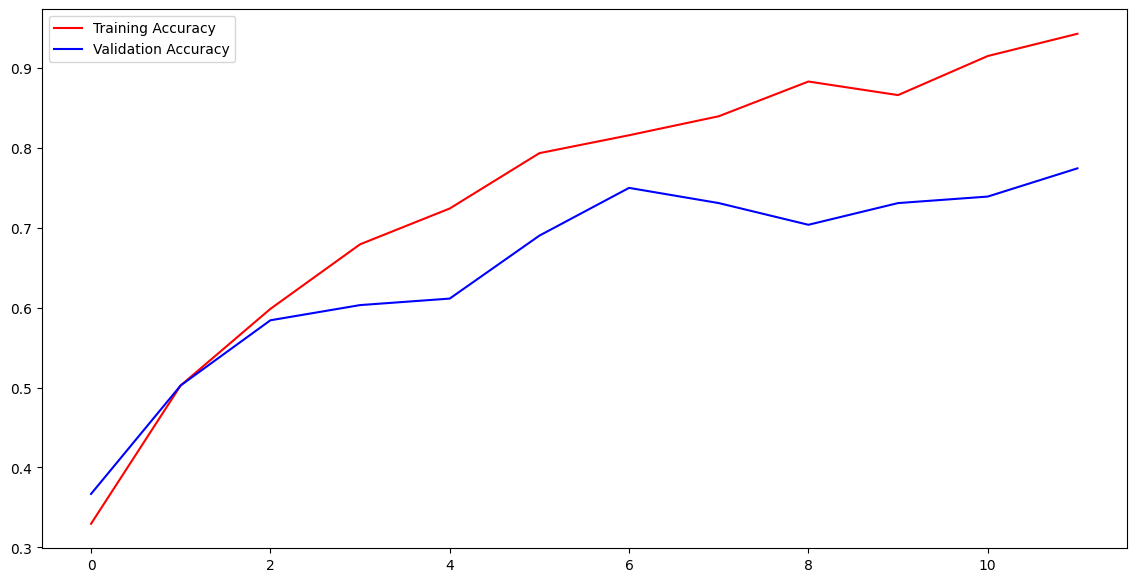

In [107]:

train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(train_acc))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,train_acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.legend(loc='upper left')
plt.show()

In [108]:
cnn = InceptionResNetV2(include_top=False , input_shape= (224,224 , 3))
cnn.trainable = False
cnn.summary()

Model: "inception_resnet_v2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_207 (Conv2D)            (None, 111, 111, 32  864         ['input_4[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_203 (Batch  (None, 111, 111, 32  96         ['conv2d_207[0][0]']             
 Normalization)                 )                                               

In [109]:
def build_model():
    input_layer = Input((224,224 , 3))
    x = cnn(input_layer)
    x = GlobalAveragePooling2D()(x)
    x = Dense(500,activation='relu') (x)
    
    x = Dense(200,activation = 'relu')(x)
   
    output = Dense(5 , activation = 'softmax')(x)
    return Model(inputs = input_layer , outputs = output)

In [110]:
model3 = build_model()

In [111]:
model3.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 inception_resnet_v2 (Functi  (None, 5, 5, 1536)       54336736  
 onal)                                                           
                                                                 
 global_average_pooling2d_1   (None, 1536)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_9 (Dense)             (None, 500)               768500    
                                                                 
 dense_10 (Dense)            (None, 200)               100200    
                                                                 
 dense_11 (Dense)            (None, 5)                 1005

In [112]:
error = SparseCategoricalCrossentropy()
model3.compile(optimizer="adam",loss = error , metrics = 'accuracy')

In [113]:
history = model3.fit(x_train_scaled, y_train, epochs=12, batch_size=32,
                   validation_data=(x_val_scaled,y_val))

Epoch 1/12
46/46 [==============================] - 20s 209ms/step - loss: 1.5912 - accuracy: 0.3485 - val_loss: 1.3861 - val_accuracy: 0.4348
Epoch 2/12
46/46 [==============================] - 6s 126ms/step - loss: 1.1827 - accuracy: 0.5231 - val_loss: 1.1287 - val_accuracy: 0.5245
Epoch 3/12
46/46 [==============================] - 6s 125ms/step - loss: 1.0004 - accuracy: 0.6005 - val_loss: 1.2268 - val_accuracy: 0.4810
Epoch 4/12
46/46 [==============================] - 6s 125ms/step - loss: 0.8798 - accuracy: 0.6583 - val_loss: 0.9049 - val_accuracy: 0.6549
Epoch 5/12
46/46 [==============================] - 6s 126ms/step - loss: 0.6715 - accuracy: 0.7561 - val_loss: 0.8428 - val_accuracy: 0.6549
Epoch 6/12
46/46 [==============================] - 6s 126ms/step - loss: 0.5743 - accuracy: 0.7826 - val_loss: 0.8429 - val_accuracy: 0.6685
Epoch 7/12
46/46 [==============================] - 6s 125ms/step - loss: 0.5069 - accuracy: 0.8037 - val_loss: 0.7179 - val_accuracy: 0.7011
Epoch

In [114]:
loss, acc = model3.evaluate(x_val_scaled,y_val)
print("Accuracy on Test Data:",acc)
print()
loss, acc = model3.evaluate(x_train_scaled,y_train)
print("Accuracy on Train Data:",acc)

12/12 [==============================] - 1s 98ms/step - loss: 0.6329 - accuracy: 0.7772
Accuracy on Test Data: 0.7771739363670349

46/46 [==============================] - 5s 103ms/step - loss: 0.1682 - accuracy: 0.9545
Accuracy on Train Data: 0.954483687877655


In [115]:
y_pred = model3.predict(x_val_scaled)
y_pred_label = [np.argmax(i) for i in y_pred]
y_pred_label[:10]

12/12 [==============================] - 4s 94ms/step


[4, 3, 1, 2, 4, 4, 0, 1, 1, 1]

In [116]:
y_val[:10]

array([4, 3, 0, 2, 4, 4, 0, 2, 1, 1])

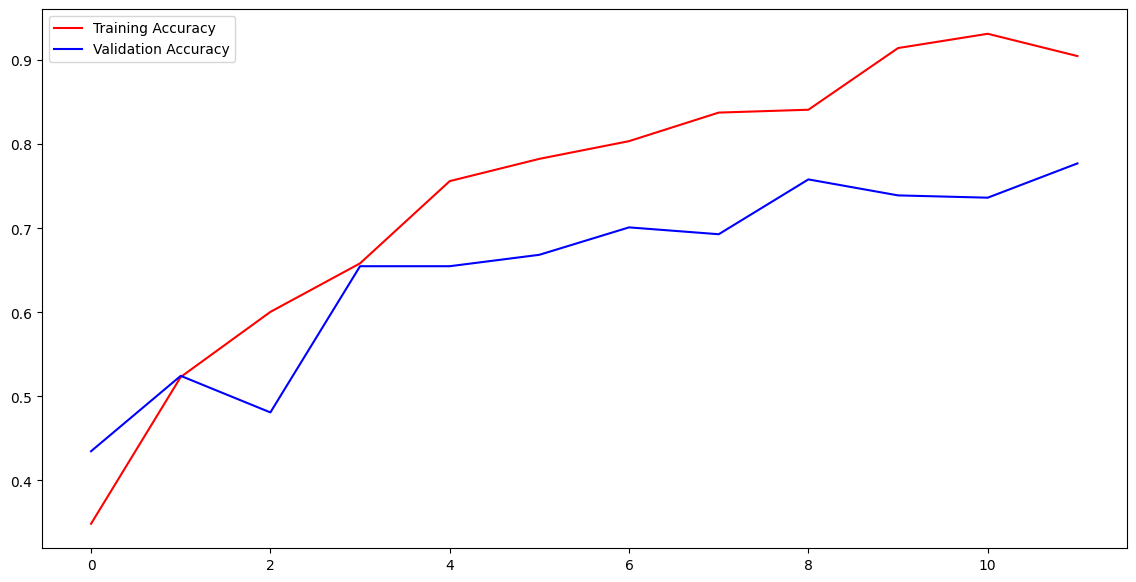

In [117]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(train_acc))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,train_acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.legend(loc='upper left')
plt.show()

In [ ]:
# # With data augmentation to prevent overfitting and handling the imbalance in dataset

# datagen = ImageDataGenerator(
#         featurewise_center=False,  # set input mean to 0 over the dataset
#         samplewise_center=False,  # set each sample mean to 0
#         featurewise_std_normalization=False,  # divide inputs by std of the dataset
#         samplewise_std_normalization=False,  # divide each input by its std
#         zca_whitening=False,  # apply ZCA whitening
#         rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
#         zoom_range = 0.2, # Randomly zoom image 
#         width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
#         height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
#         horizontal_flip = True,  # randomly flip images
#         vertical_flip=False)  # randomly flip images

# image_size=500
# train_generator = datagen.flow_from_directory(
#         train_path,
#         target_size=(image_size, image_size),
#         batch_size=24,
#         class_mode='categorical')

In [ ]:
# from keras.preprocessing.image import ImageDataGenerator
# train_datagen = ImageDataGenerator(rescale=1.0/255,
#                                   zoom_range=0.2,
#                                   width_shift_range=0.2,
#                                   height_shift_range=0.2,
#                                   fill_mode='nearest')
# train_generator = train_datagen.flow_from_directory("/kaggle/input/UBC-OCEAN",
#                                                    target_size=(224, 224),
#                                                    batch_size=32,
#                                                    class_mode='categorical',
#                                                    shuffle=True)

In [ ]:
# tr_gen = ImageDataGenerator()
# ts_gen = ImageDataGenerator()
# train_gen = tr_gen.flow_from_dataframe( train_df, x_col= 'filepaths', y_col= 'labels', target_size= (224, 224), class_mode= 'categorical',
#                                     color_mode= 'rgb', shuffle= True, batch_size= 16)

# valid_gen = ts_gen.flow_from_dataframe( valid_df, x_col= 'filepaths', y_col= 'labels', target_size= (224, 224), class_mode= 'categorical',
#                                     color_mode= 'rgb', shuffle= True, batch_size= 16)